# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
data_df = pd.read_csv("vehicle.csv")
data_df.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
data_df.shape

(846, 19)

In [4]:
# check data types
data_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
data_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

# Data pre-processing 

In [6]:
# Check for missing value
data_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
# Check median of each column
data_df.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

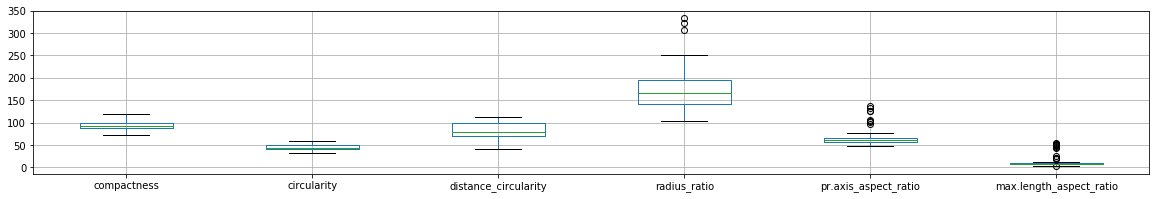

In [8]:
data_df[['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio']].boxplot(figsize=(20,3))

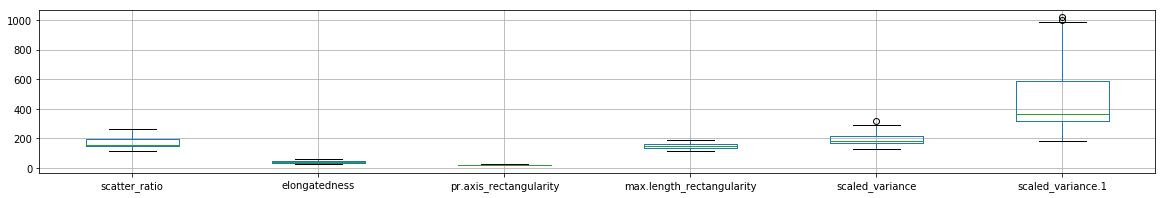

In [9]:
data_df[['scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1']].boxplot(figsize=(20,3))

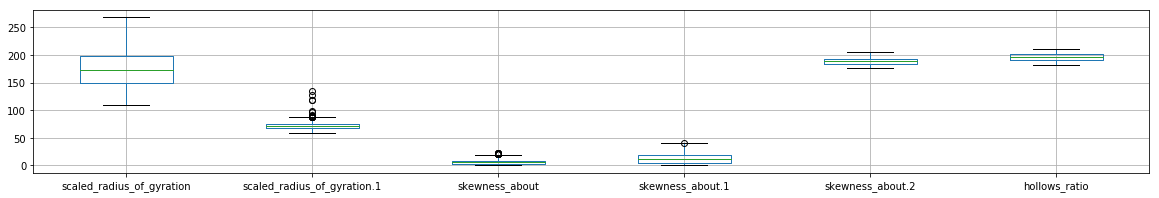

In [10]:
data_df[['scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']].boxplot(figsize=(20,3))

There are outliers in **scaled_variance**, **scaled_variance.1**, **scaled_radius_of_gyration.1**,**skewness_about** and **skewness_about.1**

In [11]:
# filling the missing values with mean or median
data_df['circularity'].fillna(value=data_df['circularity'].mean(),inplace=True)
data_df['distance_circularity'].fillna(value=data_df['distance_circularity'].mean(),inplace=True)
data_df['radius_ratio'].fillna(value=data_df['radius_ratio'].median(),inplace=True)
data_df['pr.axis_aspect_ratio'].fillna(value=data_df['pr.axis_aspect_ratio'].median(),inplace=True)
data_df['scatter_ratio'].fillna(value=data_df['scatter_ratio'].mean(),inplace=True)
data_df['elongatedness'].fillna(value=data_df['elongatedness'].mean(),inplace=True)
data_df['pr.axis_rectangularity'].fillna(value=data_df['pr.axis_rectangularity'].mean(),inplace=True)
data_df['scaled_variance'].fillna(value=data_df['scaled_variance'].median(),inplace=True)
data_df['scaled_variance.1'].fillna(value=data_df['scaled_variance.1'].median(),inplace=True)
data_df['scaled_radius_of_gyration'].fillna(value=data_df['scaled_radius_of_gyration'].mean(),inplace=True)
data_df['scaled_radius_of_gyration.1'].fillna(value=data_df['scaled_radius_of_gyration.1'].median(),inplace=True)
data_df['skewness_about'].fillna(value=data_df['skewness_about'].median(),inplace=True)
data_df['skewness_about.1'].fillna(value=data_df['skewness_about.1'].median(),inplace=True)
data_df['skewness_about.2'].fillna(value=data_df['skewness_about.2'].mean(),inplace=True)

# Understanding the attributes 

In [12]:
# check descriptive stats
data_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.828775             82.110451    168.874704   
std       8.234474     6.133943             15.740902     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.901775   
std                7.882188                 4.601217      33.195188   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.811559                2.588326                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.709716   
std          31.360427         176.496341                  32.546223   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 174.000000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.919527     195.632388  
std            6.152166       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [13]:
corr = data_df.corr(method='pearson')
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689743     0.620709              0.766780   
pr.axis_aspect_ratio            0.091534     0.153089              0.158287   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762070     0.797083              0.861544   
scaled_variance.1               0.814012     0.836984              0.886040   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.249593     0.053015             -0.225439   
skewness_about                  0.236078     0.144505              0.114206   
skewness_about.1                0.157015    -0.011851              0.265266   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620709              0.153089   
distance_circularity             0.766780              0.158287   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.733953              0.103542   
elongatedness                   -0.789515             -0.183055   
pr.axis_rectangularity           0.708005              0.079204   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536240              0.121885   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382087              0.239762   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450052       0.733953   
pr.axis_aspect_ratio                        0.648724       0.103542   
max.length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr.axis_rectangularity                      0.161592       0.989370   
max.length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318957       0.948036   
scaled_variance.1                           0.143253       0.992504   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration.1                 0.295735      -0.027683   
skewness_about                              0.015599       0.074432   
skewness_about.1                            0.043422       0.212796   
skewness_about.2                           -0.

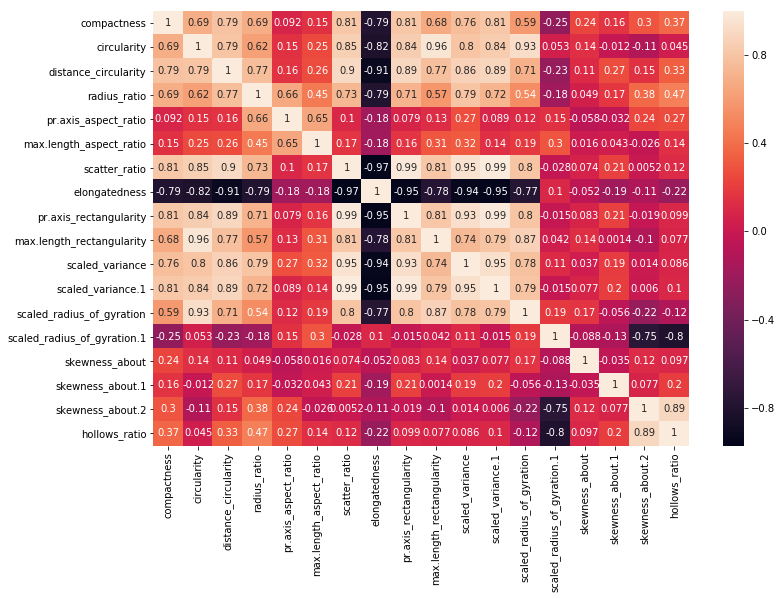

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)

* **scatter_ratio** has the highest correlation with the **scaled_variance.1** and **pr.axis_rectangularity** (which is a positive correlation)
* **pr.axis_rectangularity** has the highest correlation with the **scaled_variance.1**

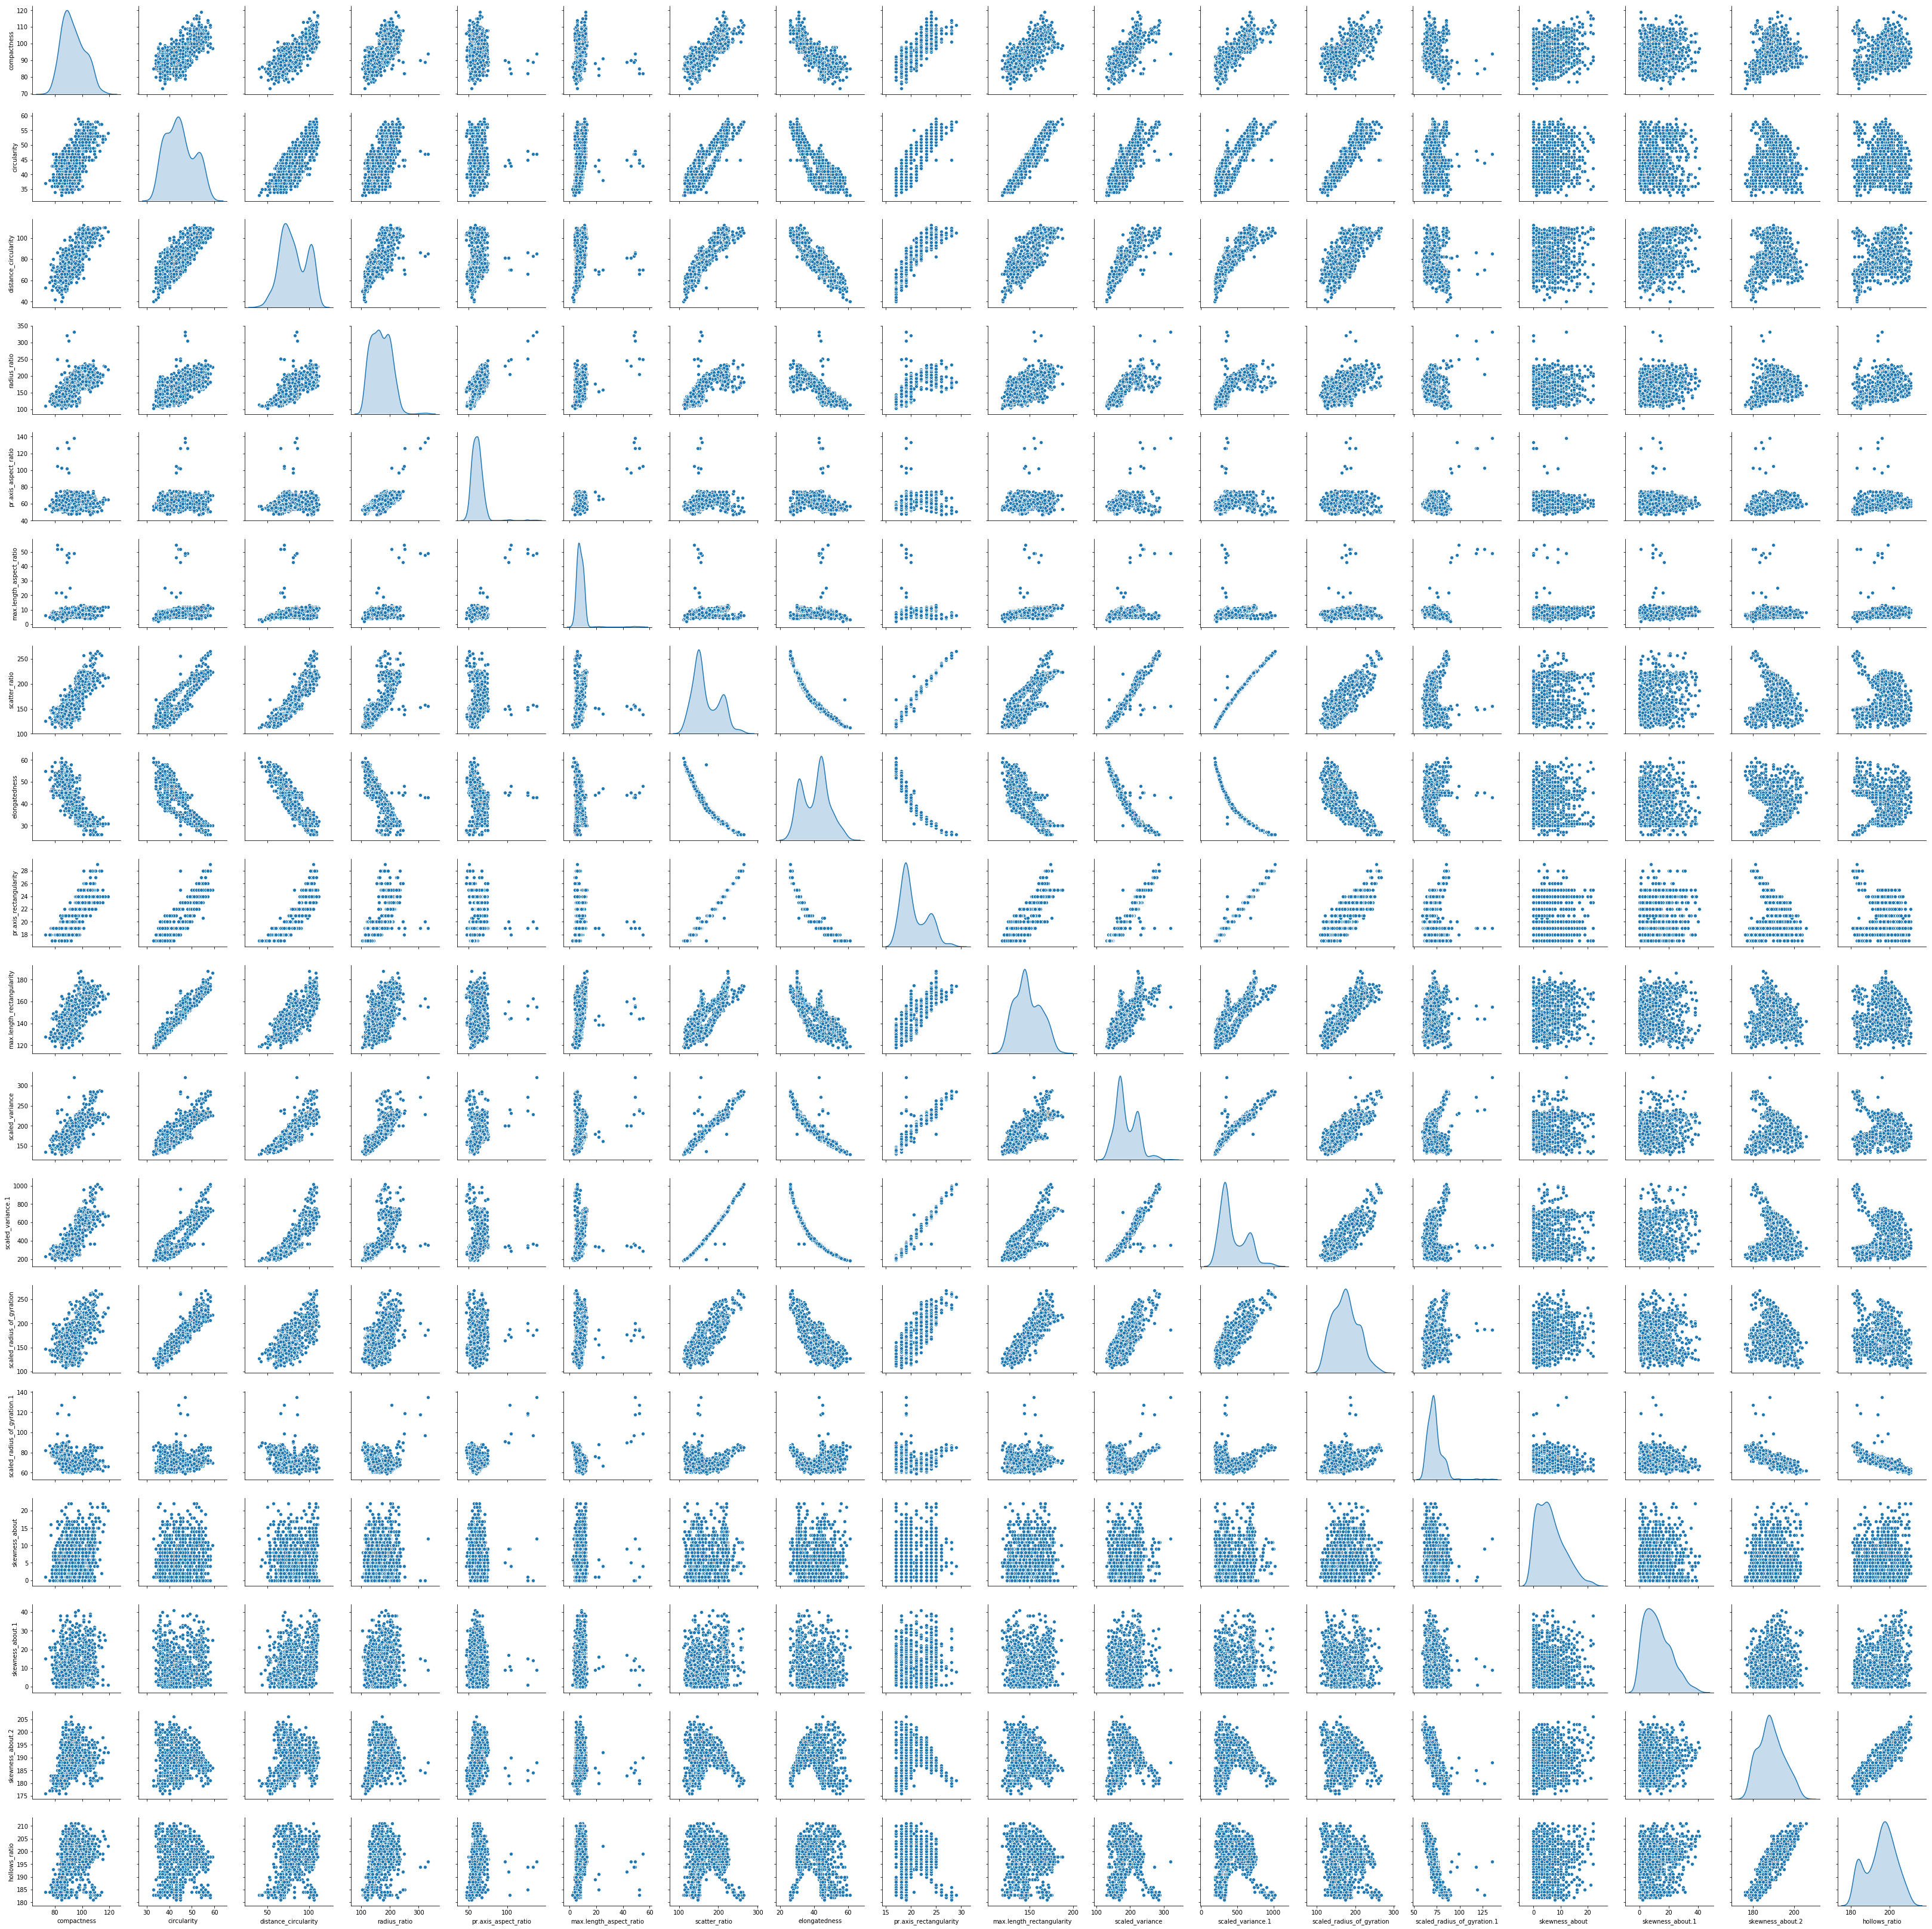

In [15]:
sns.pairplot(data_df,diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227A6836A58>,
      dtype=object)

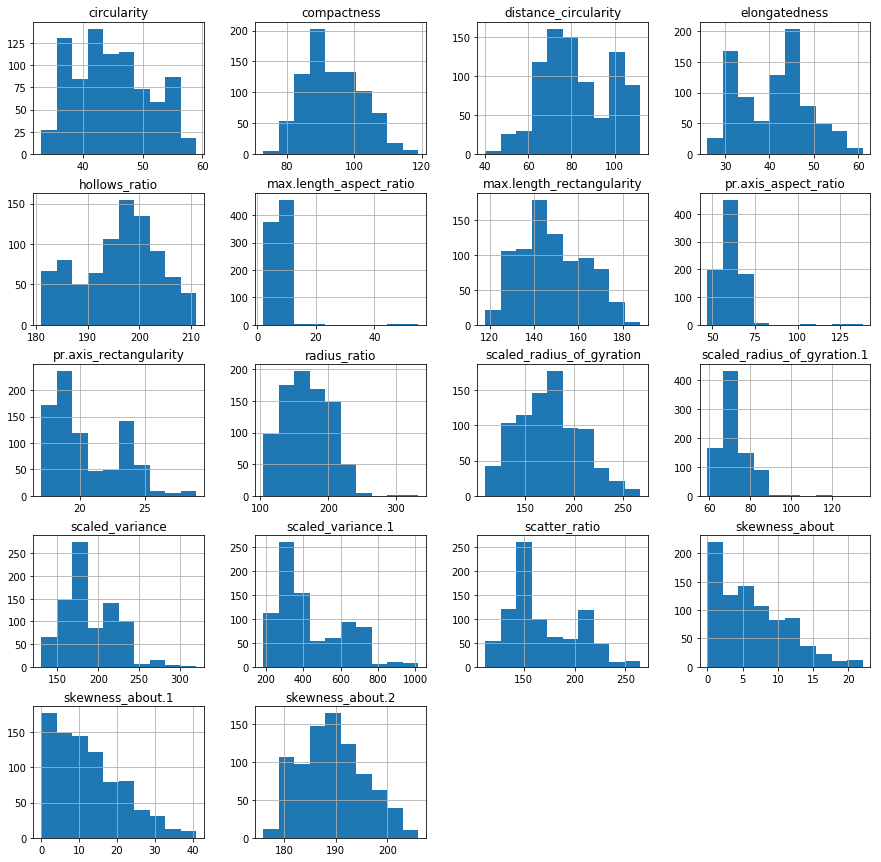

In [16]:
data_df.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227A9D20668>,
      dtype=object)

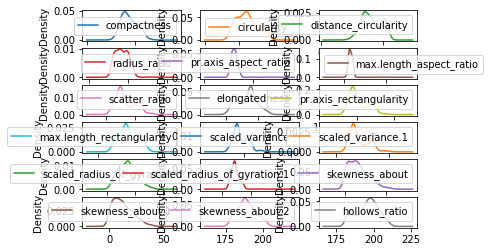

In [17]:
data_df.plot(kind='density', subplots=True, layout=(6,3), sharex=False, sharey=False)

None of the features have a Guassian Distribution. All of them have a positive skew except 'hollows_ratio' and 'elongatedness', which have negative skews

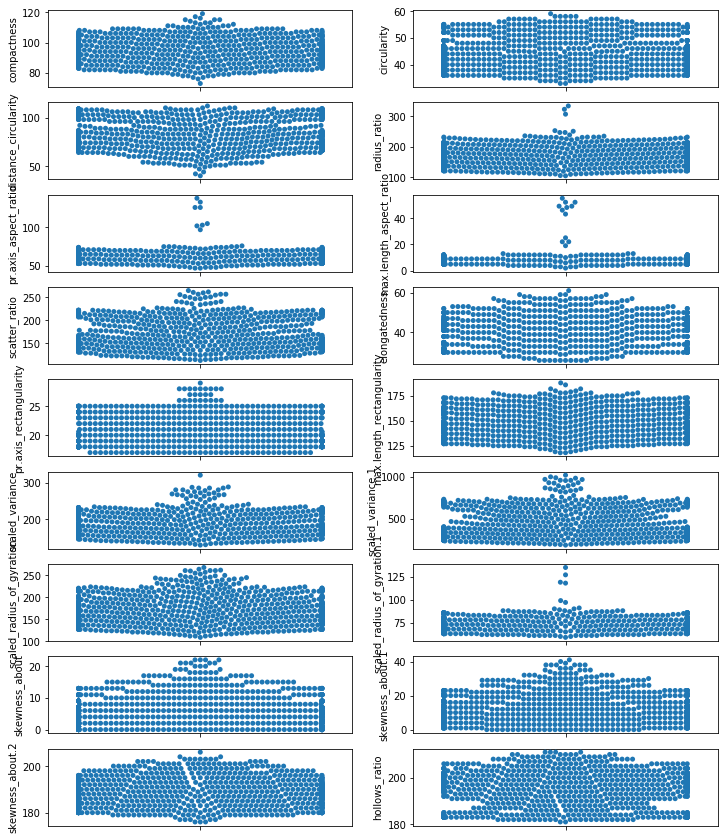

In [18]:
fig, axarr = plt.subplots(9, 2, figsize=(12, 15))
sns.swarmplot(y=data_df["compactness"],ax=axarr[0][0])
sns.swarmplot(y=data_df["circularity"],ax=axarr[0][1])
sns.swarmplot(y=data_df["distance_circularity"],ax=axarr[1][0])
sns.swarmplot(y=data_df["radius_ratio"],ax=axarr[1][1])
sns.swarmplot(y=data_df["pr.axis_aspect_ratio"],ax=axarr[2][0])
sns.swarmplot(y=data_df["max.length_aspect_ratio"],ax=axarr[2][1])
sns.swarmplot(y=data_df["scatter_ratio"],ax=axarr[3][0])
sns.swarmplot(y=data_df["elongatedness"],ax=axarr[3][1])
sns.swarmplot(y=data_df["pr.axis_rectangularity"],ax=axarr[4][0])
sns.swarmplot(y=data_df["max.length_rectangularity"],ax=axarr[4][1])
sns.swarmplot(y=data_df["scaled_variance"],ax=axarr[5][0])
sns.swarmplot(y=data_df["scaled_variance.1"],ax=axarr[5][1])
sns.swarmplot(y=data_df["scaled_radius_of_gyration"],ax=axarr[6][0])
sns.swarmplot(y=data_df["scaled_radius_of_gyration.1"],ax=axarr[6][1])
sns.swarmplot(y=data_df["skewness_about"],ax=axarr[7][0])
sns.swarmplot(y=data_df["skewness_about.1"],ax=axarr[7][1])
sns.swarmplot(y=data_df["skewness_about.2"],ax=axarr[8][0])
sns.swarmplot(y=data_df["hollows_ratio"],ax=axarr[8][1])

In [19]:
# replace car, bus and van to 0,1 and 2
data_df['class'].replace('car',0,inplace=True)
data_df['class'].replace('bus',1,inplace=True)
data_df['class'].replace('van',2,inplace=True)

In [20]:
data_df['class'].value_counts()

0    429
1    218
2    199
Name: class, dtype: int64

# feature selection

In [21]:
data_X = data_df.drop(['class'],axis=1)
data_Y = data_df['class']

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(data_X,data_Y)

In [23]:
print('Score list:', select_feature.scores_)
print('Feature list:', data_X.columns)

Score list: [5.95063655e+01 4.77458053e+01 5.01533755e+02 9.05664020e+02
 1.43494614e+01 9.52613018e+01 1.25717687e+03 3.26346269e+02
 5.64562800e+01 2.44258181e+01 8.50531220e+02 1.26506586e+04
 4.54183797e+02 1.01988368e+02 1.20813534e+02 4.54971387e+02
 2.11168268e+00 2.92779241e+01]
Feature list: Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')


In [24]:
features = select_feature.transform(data_X)
features

array([[ 83., 178., 162., 176., 379.],
       [ 84., 141., 149., 170., 330.],
       [106., 209., 207., 223., 635.],
       ...,
       [101., 222., 222., 228., 721.],
       [ 78., 146., 135., 155., 270.],
       [ 66., 123., 120., 140., 212.]])

Best 5 feature to classify is that **distance_circularity**,**radius_ratio**,**scatter_ratio**,**scaled_variance** and **scaled_variance.1** So lets se what happens if we use only these best scored 5 feature

# Create a covariance matrix for identifying Principal components

In [25]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 6.78065662e+01  3.46204941e+01  1.02386510e+02  1.89708781e+02
   5.94109698e+00  5.61695413e+00  2.22020316e+02 -5.07287112e+01
   1.73414349e+01  8.08185544e+01  1.96794514e+02  1.18304855e+03
   1.56822459e+02 -1.53502161e+01  9.53181418e+00  1.15471344e+01
   1.51233038e+01  2.23917272e+01]
 [ 3.46204941e+01  3.76252587e+01  7.65686612e+01  1.27172085e+02
   7.40168016e+00  7.08999289e+00  1.72709659e+02 -3.93819208e+01
   1.34153156e+01  8.56496155e+01  1.53329347e+02  9.06134368e+02
   1.85040913e+02  2.42876401e+00  4.34616721e+00 -6.49222889e-01
  -3.98672070e+00  2.06782289e+00]
 [ 1.02386510e+02  7.65686612e+01  2.47776010e+02  4.03147894e+02
   1.96391109e+01  1.91606656e+01  4.72569263e+02 -1.12070961e+02
   3.63883544e+01  1.77003805e+02  4.25293754e+02  2.46160706e+03
   3.61664563e+02 -2.65036065e+01  8.81456380e+00  3.72915319e+01
   1.40963866e+01  3.88861727e+01]
 [ 1.89708781e+02  1.27172085e+02  4.03147894e+02  1.11565055e+03
   1.74669579e+

In [26]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.59752056e-02 -5.23280283e-02  3.34200585e-02 -1.66284081e-01
  -3.63230979e-02 -1.26918263e-01  1.19964346e-01  4.60725021e-01
  -1.61458503e-01 -3.92083663e-01  6.90662764e-01 -1.70662848e-01
  -1.00315300e-01  1.11929949e-02 -1.35340270e-01  6.90430963e-03
  -9.24499933e-02  8.61703950e-03]
 [-2.77988817e-02  2.01466372e-02 -1.23314981e-01 -9.06287876e-02
   2.31556474e-02 -1.12157619e-01 -1.02214016e-01  2.79932021e-02
   6.07486510e-02 -6.68738366e-02 -4.19774535e-02  1.29827116e-01
   2.59103649e-03 -2.26904984e-02  1.45025034e-03  9.60092956e-01
  -4.31209535e-02 -1.06330580e-02]
 [-7.52206863e-02 -1.10677873e-01 -2.22486091e-02 -2.73141821e-01
   4.10317167e-01 -3.32360730e-01  2.00005452e-01 -4.25921883e-01
  -4.18804503e-01  3.13121034e-01  2.18586921e-01  6.96501717e-02
  -2.55935191e-01  1.73477880e-03  7.39703651e-02  8.52500127e-03
   8.00129409e-02 -5.68310053e-02]
 [-1.31261188e-01 -8.58982676e-01 -2.15033508e-01  9.34313307e-04
  -1.16848460e-01  

In [27]:
# Find variance and cumulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 95.82544427  97.65002681  98.87183829  99.26890905  99.47417235
  99.60873168  99.72982775  99.80837522  99.8725987   99.9124287
  99.94480342  99.96593307  99.97971431  99.98777603  99.99268465
  99.99664137  99.99970785 100.        ]


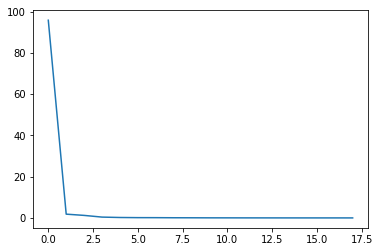

In [28]:
plt.plot(var_exp)

In [29]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 9 PCA dimensions (dimensionality reduction from 18 to 9)

pca = PCA(n_components=9)
data_reduced = pca.fit_transform(data_X)
data_reduced.transpose()

array([[-5.67891518e+01, -1.16322505e+02,  2.12083314e+02, ...,
         2.96506354e+02, -1.80734928e+02, -2.47045038e+02],
       [ 1.32644311e+01, -9.66525456e+00,  8.82091061e+00, ...,
         1.53140395e+01,  2.58554633e+00, -1.37539132e+01],
       [ 2.43288490e+01, -3.63456577e+00,  1.78939315e+01, ...,
        -8.41874589e+00, -9.49062073e+00, -1.63742190e+01],
       ...,
       [ 1.03700657e+01, -4.95577793e+00, -5.05758932e+00, ...,
         1.17379732e+01, -3.00985187e+00,  5.25648345e+00],
       [-1.98940405e-02,  5.33696652e-02, -1.99566284e+00, ...,
        -2.41033464e+00, -8.78858859e+00, -3.15696117e+00],
       [-3.04391627e-01,  3.51209556e+00,  1.13906274e+01, ...,
        -1.48405136e+00,  1.32808591e+00,  1.00805422e+00]])

In [30]:
pca.components_

array([[ 3.59752056e-02,  2.77988817e-02,  7.52206863e-02,
         1.31261188e-01,  4.69951266e-03,  3.97162224e-03,
         1.76692422e-01, -4.00964344e-02,  1.37050940e-02,
         6.24227390e-02,  1.59887352e-01,  9.44842819e-01,
         1.40323680e-01, -5.22438036e-04,  2.08109945e-03,
         9.41010433e-03,  3.51274131e-04,  4.38202441e-03],
       [ 5.23280283e-02, -2.01466372e-02,  1.10677873e-01,
         8.58982676e-01,  2.43016592e-01,  8.24049754e-02,
         1.09059861e-02, -3.93267731e-02, -2.44950604e-03,
        -5.65134044e-02,  1.68108410e-01, -1.24113819e-01,
        -2.47934613e-01, -9.64501819e-02, -7.92443651e-03,
         4.79558842e-02,  1.52491937e-01,  1.89702068e-01],
       [-3.34200585e-02,  1.23314981e-01,  2.22486091e-02,
         2.15033508e-01,  1.43245806e-01,  7.71843067e-02,
         4.33031490e-03, -1.19237051e-02, -5.45905620e-04,
         2.68441973e-01,  1.35390026e-01, -2.01265950e-01,
         8.50480284e-01,  1.24340639e-01,  3.27830033e

In [31]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_X))
df_comp.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.035975     0.027799              0.075221      0.131261   
1     0.052328    -0.020147              0.110678      0.858983   
2    -0.033420     0.123315              0.022249      0.215034   
3    -0.166284    -0.090629             -0.273142      0.000934   
4    -0.036323     0.023156              0.410317     -0.116848   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.004700                 0.003972       0.176692   
1              0.243017                 0.082405       0.010906   
2              0.143246                 0.077184       0.004330   
3              0.188728                 0.106573      -0.041383   
4             -0.082303                 0.117609       0.158368   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.040096                0.013705                   0.062423   
1      -0.039327               -0.002450                  -0.056513   
2      -0.011924               -0.000546                   0.268442   
3       0.031189               -0.004277                  -0.276759   
4      -0.033966                0.011717                   0.138542   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.159887           0.944843                   0.140324   
1         0.168108          -0.124114                  -0.247935   
2         0.135390          -0.201266                   0.850480   
3         0.519822          -0.008126                  -0.142725   
4         0.238376          -0.113922                   0.061011   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.000522        0.002081          0.009410   
1                    -0.096450       -0.007924          0.047956   
2                     0.124341        0.032783         -0.166954   
3                     0.501316       -0.110506          0.037437   
4                     0.014543       -0.000899          0.814535   

   skewness_about.2  hollows_ratio  
0          0.000351       0.004382  
1          0.152492       0.189702  
2         -0.078183      -0.074607  
3         -0.250521      -0.380670  
4         -0.098058       0.056041

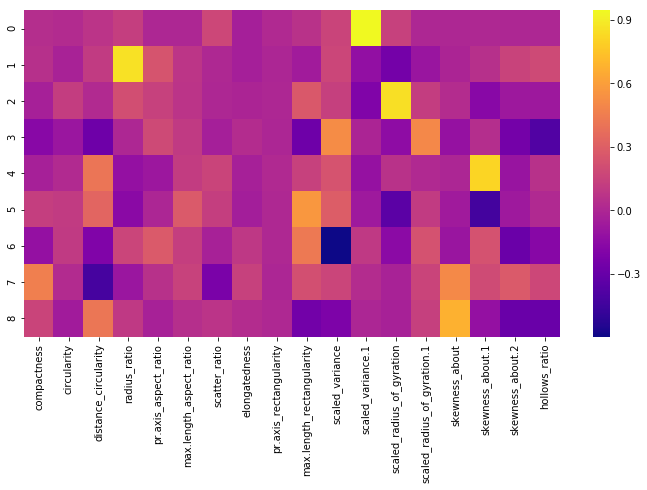

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# Support vector machines and grid search

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X = data_df.drop('class', axis = 1)
y = data_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [34]:
# Model the classifier with the default parameters C=1.0, kernel='rbf', gamma='auto'
model = SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       122
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        55

   micro avg       0.48      0.48      0.48       254
   macro avg       0.16      0.33      0.22       254
weighted avg       0.23      0.48      0.31       254

[[122   0   0]
 [ 77   0   0]
 [ 55   0   0]]


c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The average the precision of the model is around 23%. it is low accuracy, due to the parameters given. Let's try GridSearchCV from sklearn to find the optimal parameters for C, gamma and kernel from a given set of values to improve our accuracy.

In [36]:
param_grid = {'C':[0.01, 0.05, 0.5, 1],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [37]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [38]:
grid.fit(X_train,y_train)

c:\users\saikumaryava\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ...........

[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.5, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.5, gamma=0.001, kernel=linear, total=   0.3s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.5, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   10.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [39]:
grid.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}

In [40]:
predic = grid.predict(X_test)

In [41]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       122
           1       0.96      0.90      0.93        77
           2       0.89      0.98      0.93        55

   micro avg       0.94      0.94      0.94       254
   macro avg       0.93      0.94      0.93       254
weighted avg       0.94      0.94      0.94       254

[[115   3   4]
 [  5  69   3]
 [  1   0  54]]


In [42]:
# cross validation Using SVC with selected hyper parameters from gridsearch
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = SVC(C=0.01,gamma = 1, kernel='linear')
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.9333333333333333

2 of kfold 5
accuracy_score 0.9495798319327731

3 of kfold 5
accuracy_score 0.9322033898305084

4 of kfold 5
accuracy_score 0.923728813559322

5 of kfold 5
accuracy_score 0.9145299145299145


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       122
           1       0.96      0.91      0.93        77
           2       0.91      0.95      0.93        55

   micro avg       0.94      0.94      0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254

Accuracy: 0.9409448818897638
COnfusion Matrix: 
 [[117   2   3]
 [  5  70   2]
 [  2   1  52]]


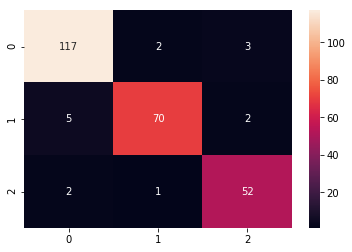

In [43]:
# predict the class on the test data
pred = model.predict(X_test)
print(classification_report(y_test,pred))
print ('Accuracy: {}'.format(accuracy_score(y_test,pred)))
print ('COnfusion Matrix: \n {}'.format(confusion_matrix(y_test,pred)))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt="d")

* Accuracy is 94%